In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Read the 'avocado.csv' with pandas. Make sure a new unnecessary column is not generated.

In [11]:
# TODO
df_avocado = pd.read_csv("avocado.csv")
df_avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
df_avocado.pop("Unnamed: 0");

#### Explore the dataset, pay attention to redundancies, note the categorical (non-numeric) variables.

In [30]:
# TODO
print("Samples in locations are null", np.where(df_avocado.isna())[0])

Samples in locations are null []


In [50]:
dataset = df_avocado.copy()

As we are gonna predict the column "AveragePrice", let's preprocess our data and see how much the features are corolated with it.

*One hot encoding.*

In [51]:
for col in ["type", "region"]:
    unique_samples, count = np.unique(dataset[col], return_counts=True)
    print(f"The column '{col}' has unique samples {unique_samples}, with their counts respectively {count}")

The column 'type' has unique samples ['conventional' 'organic'], with their counts respectively [9126 9123]
The column 'region' has unique samples ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico'], with their counts respectively [338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 3

In [52]:
# keep track of the new columns to see if the encoding has been done correctly
new_columns = []

for col in ["type", "region"]:
    unique_samples, count = np.unique(dataset[col], return_counts=True)
    # as they are strings
    for name in unique_samples:
        new_columns.append(name)
        dataset[name] = 0
        ind = np.where(dataset[col] == name)[0]
        dataset[name].iloc[ind] = 1

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [53]:
for col in new_columns:
    print(f"{col} occures {dataset[col].sum()} times.")

conventional occures 9126 times.
organic occures 9123 times.
Albany occures 338 times.
Atlanta occures 338 times.
BaltimoreWashington occures 338 times.
Boise occures 338 times.
Boston occures 338 times.
BuffaloRochester occures 338 times.
California occures 338 times.
Charlotte occures 338 times.
Chicago occures 338 times.
CincinnatiDayton occures 338 times.
Columbus occures 338 times.
DallasFtWorth occures 338 times.
Denver occures 338 times.
Detroit occures 338 times.
GrandRapids occures 338 times.
GreatLakes occures 338 times.
HarrisburgScranton occures 338 times.
HartfordSpringfield occures 338 times.
Houston occures 338 times.
Indianapolis occures 338 times.
Jacksonville occures 338 times.
LasVegas occures 338 times.
LosAngeles occures 338 times.
Louisville occures 338 times.
MiamiFtLauderdale occures 338 times.
Midsouth occures 338 times.
Nashville occures 338 times.
NewOrleansMobile occures 338 times.
NewYork occures 338 times.
Northeast occures 338 times.
NorthernNewEngland oc

In [54]:
# now we can drop the "type" and "region"
dataset.pop("type")
dataset.pop("region");

In [57]:
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0


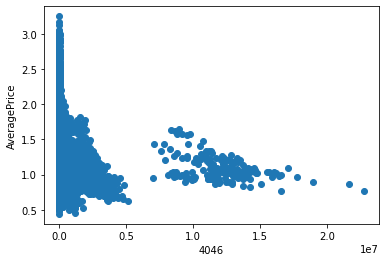

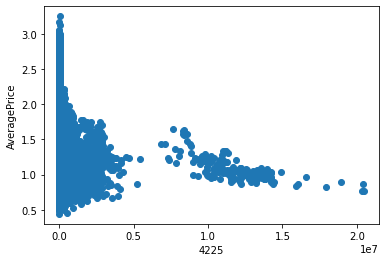

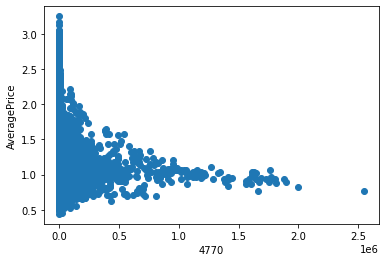

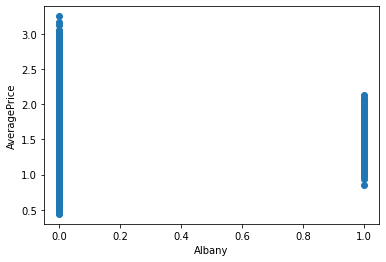

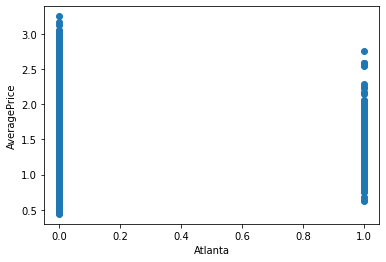

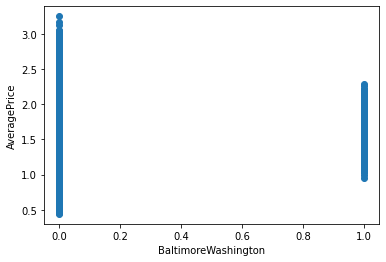

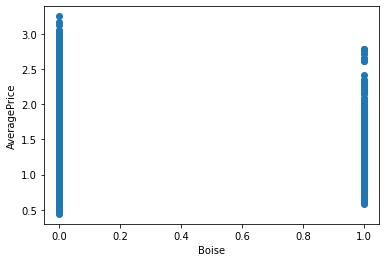

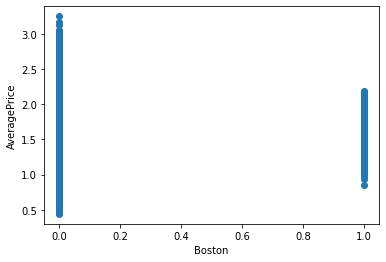

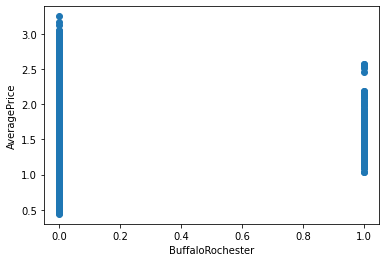

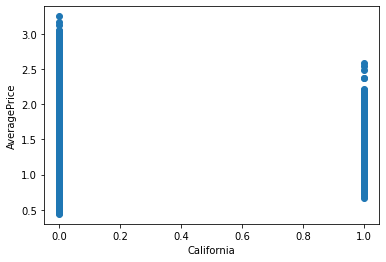

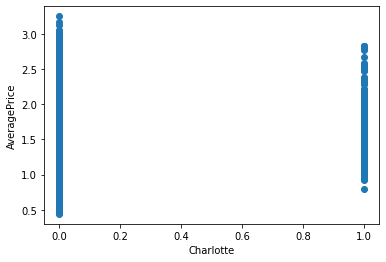

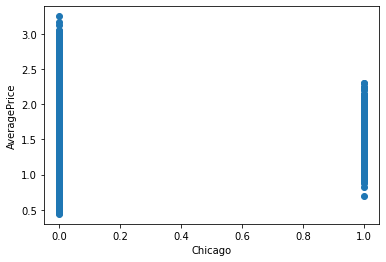

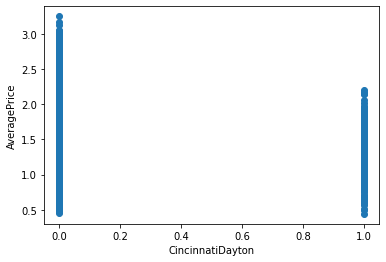

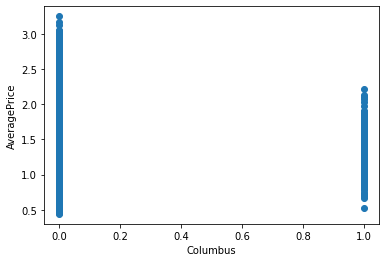

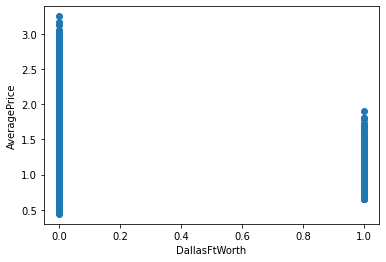

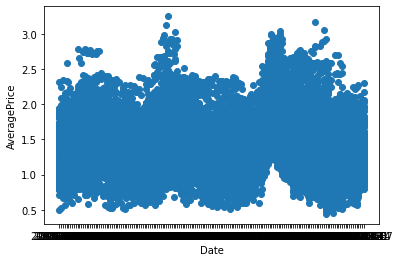

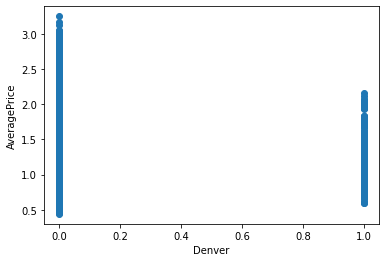

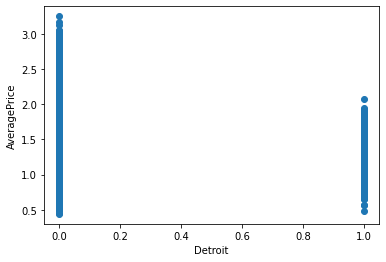

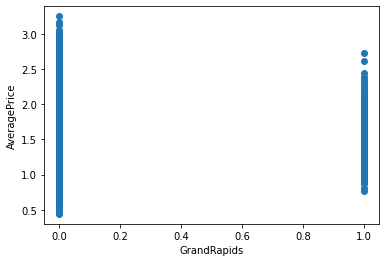

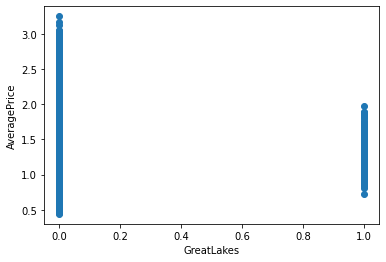

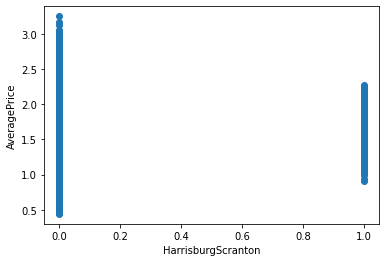

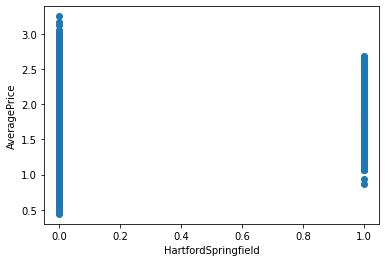

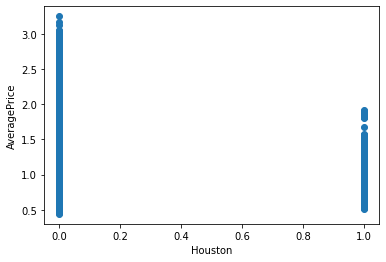

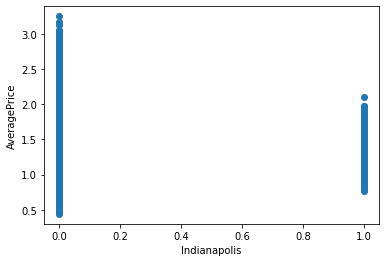

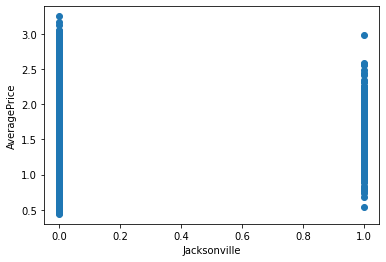

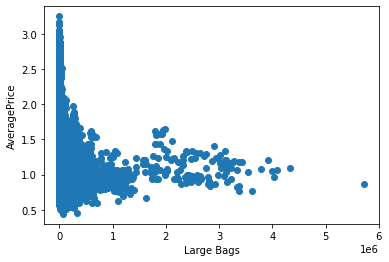

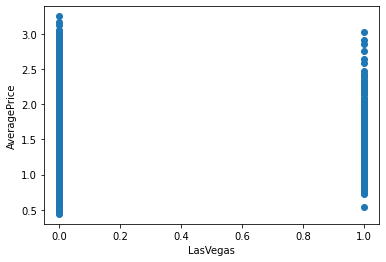

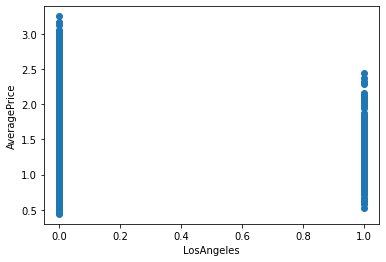

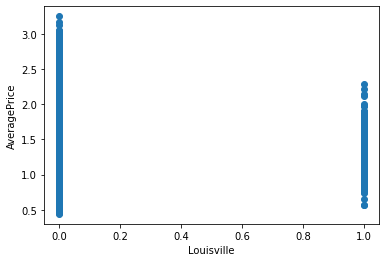

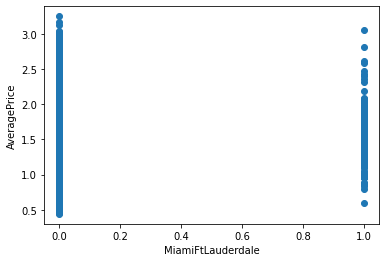

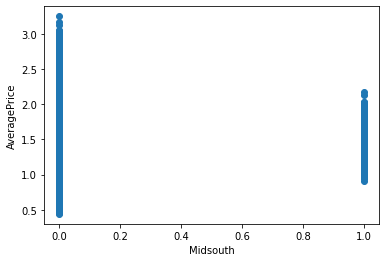

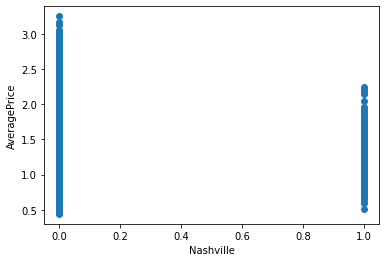

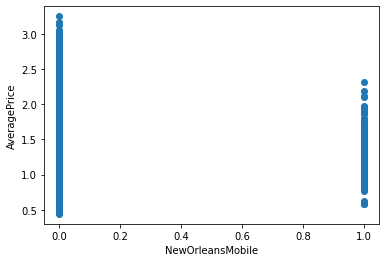

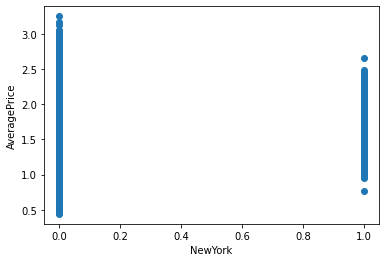

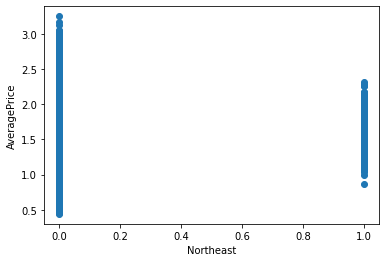

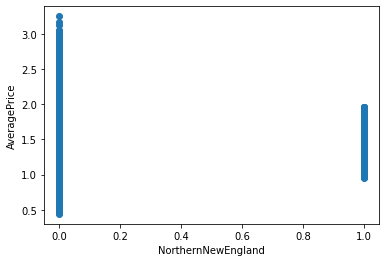

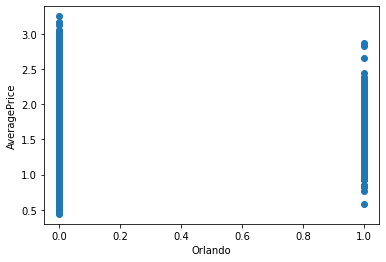

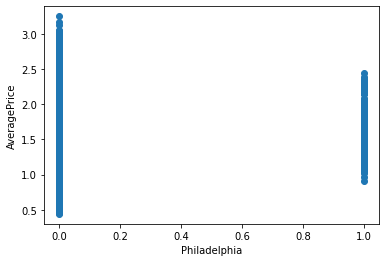

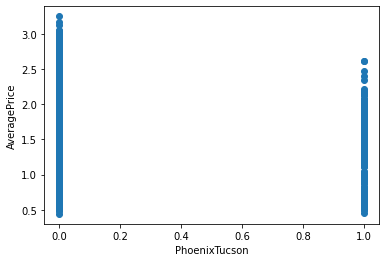

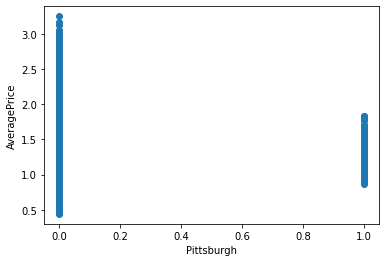

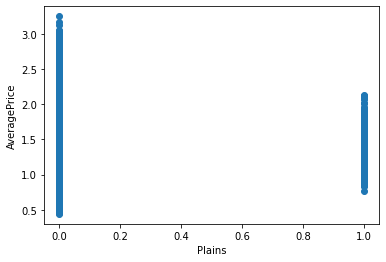

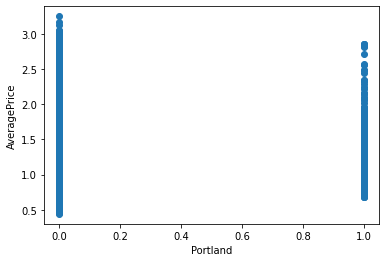

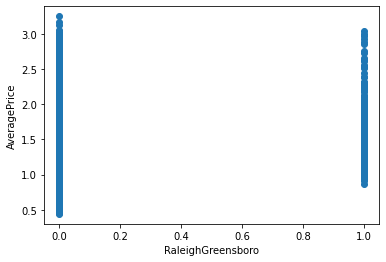

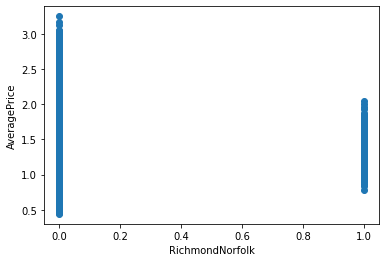

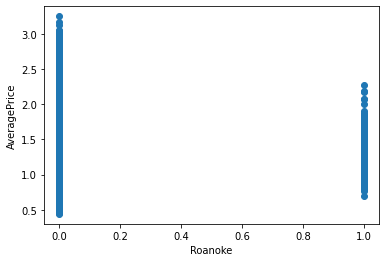

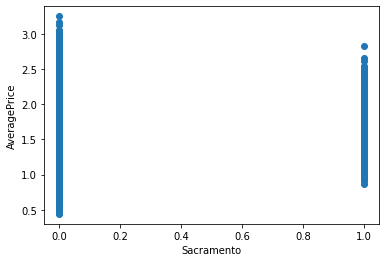

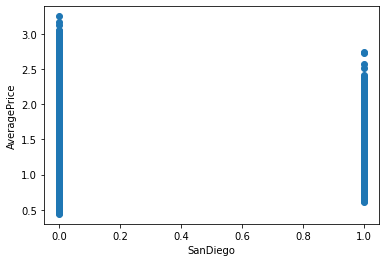

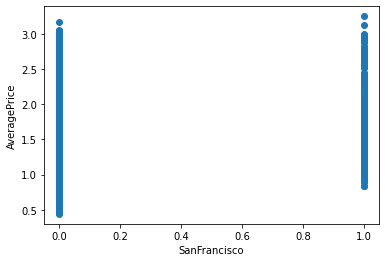

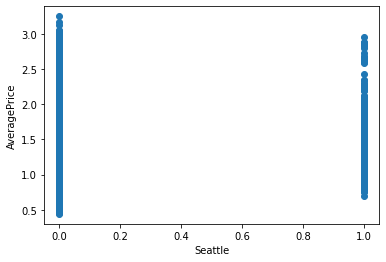

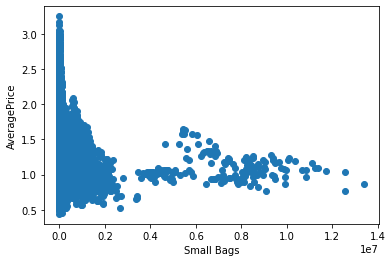

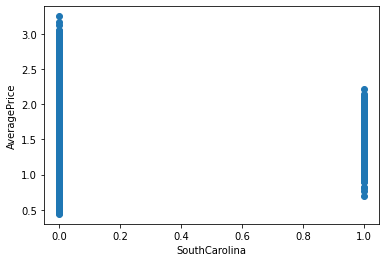

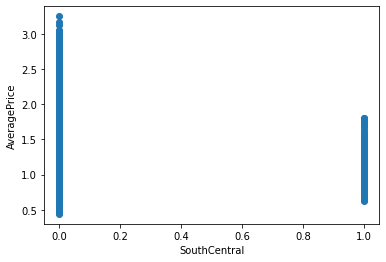

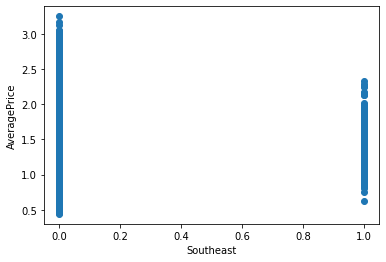

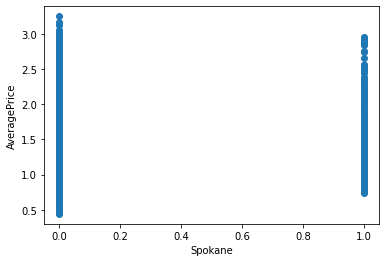

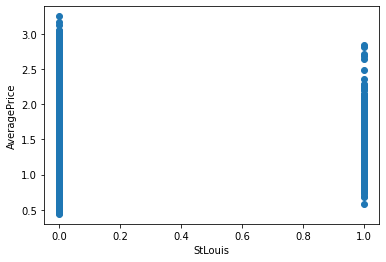

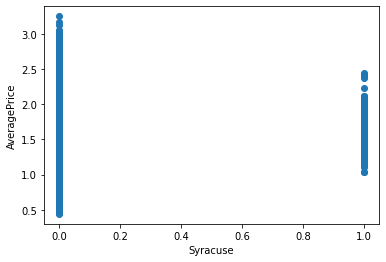

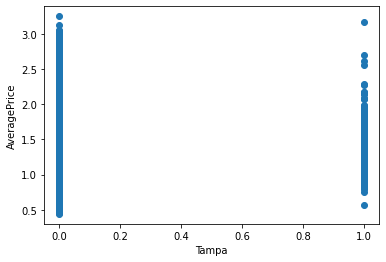

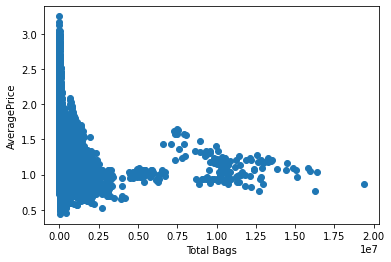

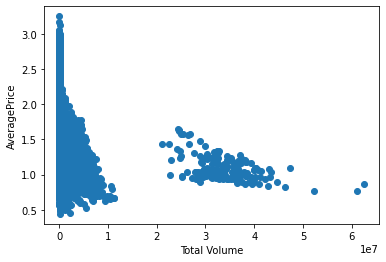

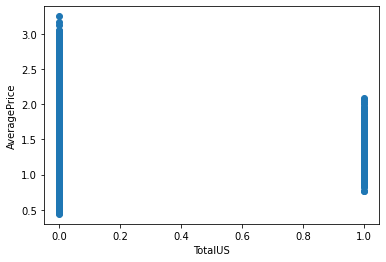

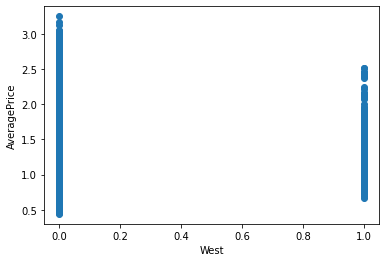

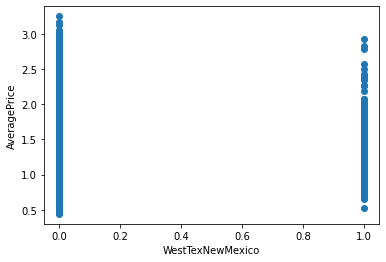

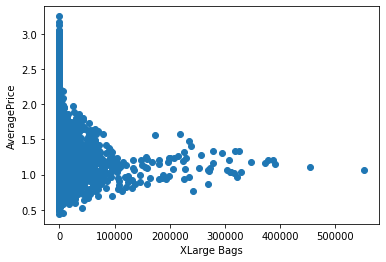

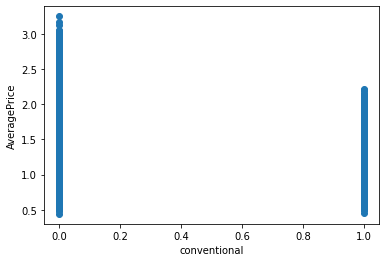

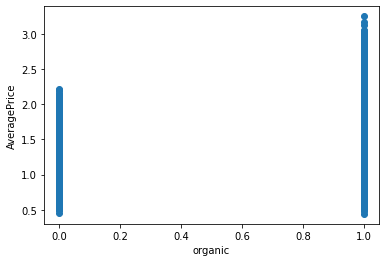

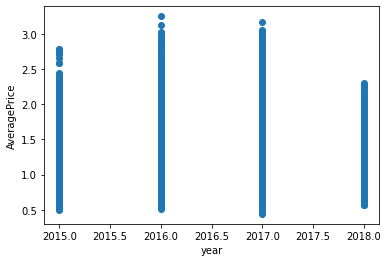

In [59]:
for i, feature in enumerate(dataset.columns.difference(["AveragePrice"])):
    plt.scatter(dataset[feature], dataset["AveragePrice"])
    plt.xlabel(feature)
    plt.ylabel("AveragePrice")
    plt.show()

#### Drop the unnecessary columns, if any. 

In [3]:
# TODO
# done above

We can see that the data is not really corrolated with the "AveragePrice" (as we could guess).

In [60]:
dataset.pop("Date");

#### Choose the 'AveragePrice' column as your target (y) variable.

In [61]:
# TODO
y = dataset.pop("AveragePrice")

#### Plot the relationship of each of the numerical features with the target variable

In [ ]:
# done above

#### Convert categorical variables to numeric. 
#### Note: variables with little amount of unique values are better to be considered categoricals.

In [6]:
# TODO
# done above

#### Devide data into Train and Test sets with the ratio 80:20.

In [73]:
# TODO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, y, shuffle=True, random_state=2021)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13686, 65), (4563, 65), (13686,), (4563,))

Before we do forward selection let's train fit linear Regression using the whole dataset to get some insights about how well we can score.

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train.to_numpy(), y_train.to_numpy())

LinearRegression()

In [128]:
# the estimators
reg.coef_[:5], reg.intercept_

(array([-1.30192766e-05,  1.30261944e-05,  1.30126144e-05,  1.29340807e-05,
        -1.91553407e-02]),
 -74.80252749262853)

In [75]:
mse_full_dataset = mean_squared_error(reg.predict(X_test.to_numpy()), y_test.to_numpy())

#### Choose 5 most relevant features from dataset with 'Forward Selection' (find in your slides).

In [86]:
def RSS(y_pred, y):
    return np.sum((y_pred - y)**2)

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# TODO

best_selected_features = []
all_featuers = dataset.columns.difference(["AveragePrice"])
number_of_best_features = 5
rss_scores = {}

for i in range(number_of_best_features):
    
    least_rss_score = np.inf
    least_rss_feature = None
    
    #                                to not take features already selected
    for feature in dataset.columns.difference(["AveragePrice", *best_selected_features]):
        lin_reg = LinearRegression()
        using_featires = best_selected_features + [feature]

        lin_reg.fit(X_train[using_featires].values, y_train.to_numpy())

        pred = lin_reg.predict(X_test[using_featires].values)
        
        pred_rss = RSS(pred, y_test.to_numpy())
        
#         print(f"RSS, {feature}", RSS(pred, y_test.to_numpy()))
        
        if least_rss_score > pred_rss:
            least_rss_score = pred_rss
            least_rss_feature = feature

    best_selected_features.append(least_rss_feature)
    rss_scores[len(best_selected_features)] = least_rss_score

In [121]:
best_selected_features

['conventional',
 'SanFrancisco',
 'HartfordSpringfield',
 'Houston',
 'DallasFtWorth']

We see that RSS score is decreasing.

In [124]:
for i, score in rss_scores.items():
    print(f"Best RSS score with {i} features is {score}.")

Best RSS score with 1 features is 475.482785340973.
Best RSS score with 2 features is 457.11978113622854.
Best RSS score with 3 features is 441.1256455385074.
Best RSS score with 4 features is 431.6504515433753.
Best RSS score with 5 features is 422.3104275934178.


In [7]:
from sklearn.metrics import mean_squared_error

# TODO
# done above

#### Choose 5 most relevant features from dataset with 'Backward Selection' (find in your slides).

In [152]:
# TODO

all_featuers = list(dataset.columns.difference(["AveragePrice"]))
current_selected_features = all_featuers[:]
removed_features = []
number_of_best_features = 5
rss_scores = {}

while len(current_selected_features) != number_of_best_features:
    
    lin_reg = LinearRegression()
    
    lin_reg.fit(X_train[current_selected_features].values, y_train.to_numpy())

    pred = lin_reg.predict(X_test[current_selected_features].values)
        
    pred_rss = RSS(pred, y_test.to_numpy())
    
    highest_p_value = 0
    highest_p_value_feature = None
    
    for est, feature in zip(lin_reg.coef_, current_selected_features[:]):
        
        # variance source https://www.calculatorsoup.com/calculators/statistics/variance-calculator.php
        variance = np.sum((X_train[feature] - X_train[feature].mean())**2) / len(X_train)
        
        # standard error
        SE_b = variance**2 / np.sum((X_train[feature] - X_train[feature].mean())**2)
        
        # compute the t statistics
        t_stat = est / SE_b
        
        # p value 
        # here df is the degree of freedom
        # having it 10 gives some apporximation to deal with the data
        p_value = stats.t.sf(abs(t_stat), df=10)
        
        if highest_p_value < p_value:
            highest_p_value = p_value
            highest_p_value_feature = feature

    current_selected_features.remove(highest_p_value_feature)
    rss_scores[len(current_selected_features)] = pred_rss

Here we can see that rss scores go down, so actually removing features is actually worse.

In [153]:
for i, score in rss_scores.items():
    print(f"Best RSS score with {i} features is {score}.")

Best RSS score with 64 features is 339.2741224108639.
Best RSS score with 63 features is 339.27003507701863.
Best RSS score with 62 features is 339.24789006173194.
Best RSS score with 61 features is 339.2697864582237.
Best RSS score with 60 features is 339.4375127497623.
Best RSS score with 59 features is 341.3166276443244.
Best RSS score with 58 features is 343.00656072690373.
Best RSS score with 57 features is 340.4625169200454.
Best RSS score with 56 features is 341.30435079345705.
Best RSS score with 55 features is 348.42927114257816.
Best RSS score with 54 features is 348.6081269241333.
Best RSS score with 53 features is 348.4422731799397.
Best RSS score with 52 features is 348.3178339172363.
Best RSS score with 51 features is 348.3724090362549.
Best RSS score with 50 features is 348.3357812733412.
Best RSS score with 49 features is 348.3164143920898.
Best RSS score with 48 features is 347.880234935379.
Best RSS score with 47 features is 348.2508411524281.
Best RSS score with 46 f

In [154]:
current_selected_features

['DallasFtWorth', 'HartfordSpringfield', 'Houston', 'NewYork', 'SanFrancisco']

#### Choose only features for further which occur in both previous results.

In [157]:
# TODO
# we see that four feautres are the same from forward and backward selection
set(current_selected_features).intersection(set(best_selected_features))

{'DallasFtWorth', 'HartfordSpringfield', 'Houston', 'SanFrancisco'}

#### Implement the function `fit_1d_linear_regression` that takes a matrix $x$ and a vector $y$, and returns a numpy array , where the first element $\beta_0$ is the intercept of the line, and remainings are the coefficients of a features, like $\beta_1$, $\beta_2$, etc.

In [166]:
import numpy as np

def fit_1d_linear_regression(X, Y):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    
    # TODO
    
    b_1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean())**2)
    # intercept
    b_0 = Y.mean() - b_1 * X.mean()
    
    return b_1, b_0


def predict(X, b_1, b_0):
    return b_1 * X + b_0


b_1, b_0 = fit_1d_linear_regression(X_train["Houston"].values, y_train.to_numpy())

In [182]:
imp_reg_pred = predict(X_test["Houston"].values, b_1, b_0)

#### Now fit the data to LinearRegression model of sklearn.linear_model.

In [183]:
from sklearn.linear_model import LinearRegression

# TODO
reg = LinearRegression()
reg.fit(X_train["Houston"].to_numpy().reshape(-1, 1), y_train.to_numpy())

sklearn_pred = reg.predict(X_test["Houston"].to_numpy().reshape(-1, 1))

In [187]:
print("RSS")
print("sklearn", RSS(sklearn_pred, y_test))
print("implemented", RSS(imp_reg_pred, y_test))
print()
print("mean_squared_error")
print("sklearn", mean_squared_error(sklearn_pred, y_test))
print("implemented", mean_squared_error(imp_reg_pred, y_test))

RSS
sklearn 762.8430849661554
implemented 762.8430849661554

mean_squared_error
sklearn 0.1671801632623615
implemented 0.1671801632623615


#### Implement the following functions: mean_squared_error, mean_absolute_error, r2_score.
#### Each of them should have 2 vector arguments and return the appropriate score.

In [13]:
# TODO
def mean_sqaured_error

#### Compare the resulting scores of your functions and scores of corresponding sklearn functions. They should be the same.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# TODO
